# Gradient Descent From Scratch 
The purpose of these experiments is to implement gradient descent from scratch for a simple linear regression for the equation $$y=ax$$. Gradient descent will be used to find the value for $$a$$ but I wanted to write the code without using Tensorflow to make sure I understood the maths. The Jupyter notebook for this can be found at [https://github.com/jpmasters/jupyter-notebooks/blob/main/gradient_descent_learning.ipynb](https://github.com/jpmasters/jupyter-notebooks/blob/main/gradient_descent_learning.ipynb)

I split the task into two parts. In part one, I created some test data with a known gradient and added some noise to make things a bit more interesting. I then plotted the mean squared error at a series of gradients to see how it is at its minimum when the gradient matches that of the test data. In part two, I added the gradient descent code so that value was minimised by following the gradient of the MSE towards zero.

## Step 1: Using the Mean Squared Error to find the gradient
We start by looking at the gradient of the line. This effectively draws a series of imaginary lines through the data and tries to find one that best fits. Once this has been found, we can extract the gradient from the imaginary line.

In [26]:
import numpy as np
import matplotlib.pyplot as plt 
import random

Start by creating the test data. In real life, we'd be getting this from some kind of data source, but for our purploses here we'll create some. That way we'll know if the code is working correctly.

The constant `INPUT_GRADIENT` holds our test data gradient. As we are starting with the the gradient only, our offset will be zero. `X_values` holds our X axis values and `Y_targets` holds the Y values of the test data.

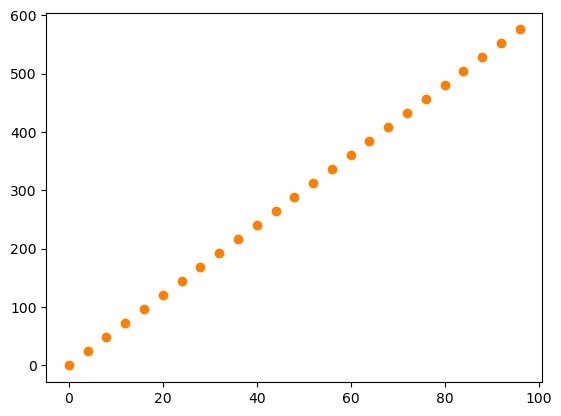

In [27]:
INPUT_GRADIENT = 6

X_values = np.arange(start=0, stop=100, step=4)
Y_targets = X_values * INPUT_GRADIENT

plt.scatter(X_values, Y_targets, c=[[1, 0.5, 0]])
plt.show()

Having test data that is so precise isn't particularly interesting, we want to make tings a bit more fun so the next thing to do is to introduce a bit of random noise.

We do this using numpy's random.normal function as this will create noise using a normal (Guassian) distribution. This kind of distribution is found a lot in nature so it's probably representative of most noise that will creep into measurements.

Having generated the noise, we add it to the Y values to create the data we'll use to attempt the fit.

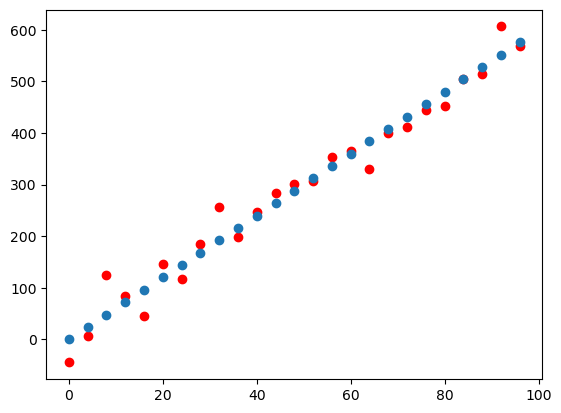

In [28]:
# create the noise to apply to the points
noise = np.random.normal(loc=0.0, scale=30.0, size=X_values.size)
Y_actuals = np.add(Y_targets, noise)

# plot the noisy vs the actual points
plt.scatter(X_values, Y_actuals, color=[1, 0, 0])
plt.scatter(X_values, Y_targets)
plt.show()


Having generated our test data, we're now going to attempt to fit a gradient to it. 

The first, simple approach we're going to adopt is to try a load of gradients and see which one fits the data best. So how do we know how good a gradient fit is? 

The way we do this is, for each of the values in our test data, we generate a new y value based on the gradient we're testing for. We then look at each of these y values and compare them to the y values in our test data. We can then calculate the Mean Square Error of the generated y values agains the test y values which will tell us how close we were.
$$MSE = \frac{1}{n}\sum_{x=0}^{n}(Y_{x}-\hat{Y_{x}})^2$$
Where $n$ is the number of Y values, $\hat{Y_{x}}$ is the Y value predicted by the test gradient and $Y_{x}$ is the y value we're trying to fit.

In [29]:
# Holds the lowest error value found while assessing gradients
min_err = -1

# holds the gradient with the lowest error found
estimated_gradient = 0

# holds the number of Y values to fit
N = Y_actuals.size

# loop through a range of gradients
for gradient_guess in range(-8, 8):

  # reset the Mean Squared Error for this gradient
  mse = 0

  # For each value in the test data
  for i in range(N):

    # get hold of the values for x, the y value in the test data
    # and the y value we would predict from the gradient we're trying
    x = X_values[i]
    actual_y = Y_actuals[i]
    predicted_y = x * gradient_guess

    # calculate the error for this Y value
    e = (actual_y - predicted_y) ** 2
    mse += e

  mse /= N
  print(f'Gradient {gradient_guess} produced an MSE of {mse}')
  if min_err == -1 or mse < min_err:
    min_err = mse
    estimated_gradient = gradient_guess

print(f'Gradient found: {estimated_gradient}, min_err: {min_err}')


Gradient -8 produced an MSE of 614579.2014047818
Gradient -7 produced an MSE of 529985.8591340209
Gradient -6 produced an MSE of 451664.5168632597
Gradient -5 produced an MSE of 379615.1745924989
Gradient -4 produced an MSE of 313837.83232173795
Gradient -3 produced an MSE of 254332.490050977
Gradient -2 produced an MSE of 201099.14778021607
Gradient -1 produced an MSE of 154137.80550945512
Gradient 0 produced an MSE of 113448.46323869417
Gradient 1 produced an MSE of 79031.12096793322
Gradient 2 produced an MSE of 50885.778697172274
Gradient 3 produced an MSE of 29012.43642641132
Gradient 4 produced an MSE of 13411.094155650377
Gradient 5 produced an MSE of 4081.7518848894256
Gradient 6 produced an MSE of 1024.4096141284772
Gradient 7 produced an MSE of 4239.067343367528
Gradient found: 6, min_err: 1024.4096141284772


## Step 2: Use the gradient curve to find the coefficient
The above code works ok when the gradient of the code is an integer and is known to be in a specific range but if either of those things isn't true, we have a problem! A better way to achieve the result is to 'follow' the gradient of the Mean Squared Error to the botton of the curve. This means it's not necessary for the gradient to be from a known series of values. 

The full gradient curve can be visualised by plotting $$y=x^2$$.

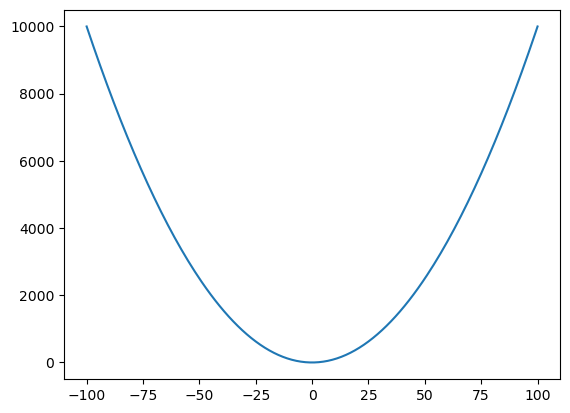

In [30]:
# plot the loss gradient curve
gc = np.array([[x for x in range(-100, 101)],[(x ** 2) for x in range(-100, 101)]])
plt.plot(gc[0], gc[1])
plt.show()

To find the coefficient, we can calculate the gradient on this curve for the MSE after calculating it for each point on the curve, starting with a random coefficient, and adjusting it to reduce the error each time. The process can be accelerated by making the adjustments proportional to the gradient of the error by multiplying the graidient by a learning rate value.

Initial gradient guess: 14
Gradient found: 6.0 Accuracy: 99.5%


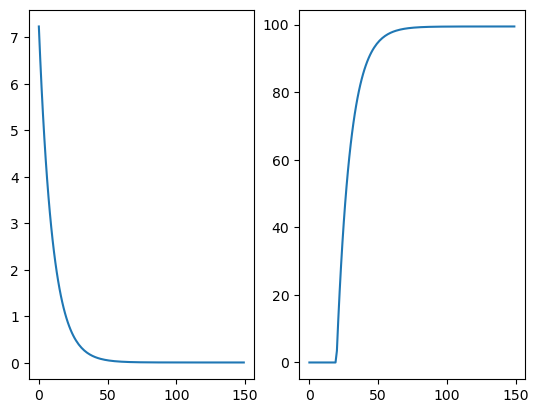

In [31]:
# Holds the lowest error value found while assessing gradients
min_err = -1

# holds the number of Y values to fit
N = Y_actuals.size

# create a random guess for the gradient
gradient_guess = random.randint(5, 50)
print(f'Initial gradient guess: {gradient_guess}')

# define the number of iterations we'll use to get to the answer
NUM_EPOCHS = 150
LEARNING_RATE = 0.001

# these arrays will help us keep track of the data in each epoch 
# so we can plot it later
loss = np.zeros(NUM_EPOCHS)
accuracy = np.zeros(NUM_EPOCHS)

# loop through a range of gradients
for epoch in range(NUM_EPOCHS):

  # reset the Mean Squared Error for this gradient
  mse = 0
  grads = np.zeros((N))
  e_squared = np.zeros((N))

  # For each value in the test data
  for i in range(N):

    # get hold of the values for x, the y value in the test data
    # and the y value we would predict from the gradient we're trying
    x = X_values[i]
    actual_y = Y_actuals[i]
    predicted_y = x * gradient_guess

    # calculate the error for this Y value
    e = (actual_y - predicted_y)

    # store the error squared so we can calculate the mean
    e_squared[i] = e ** 2

    # calculate the gradient of the error
    grads[i] = (2 * e)

  # calculate the mean squared error    
  mse  = np.mean(e_squared)

  # calculate the mean gradient of the errors
  mean_gradient = np.mean(grads)

  # update the predicted gradient
  gradient_guess += (mean_gradient * LEARNING_RATE)

  # store the loss so we can plot it later
  loss[epoch] = abs(gradient_guess - INPUT_GRADIENT)
  error_rate = min(abs(gradient_guess - INPUT_GRADIENT) * 100, 100)
  accuracy[epoch] = 100 - error_rate

print(f'Gradient found: {gradient_guess:.1f} Accuracy: {accuracy[-1]:.1f}%')

# plot the loss and accuracy curves
loss_plt = plt.subplot(1, 2, 1)
loss_plt.plot(loss)
acc_plt = plt.subplot(1, 2, 2)
acc_plt.plot(accuracy)
plt.show()
